# Module 4 Assignment: Deeper Analysis of the Movie Data with SQL

Welcome to this module's assignment!

Carefully read each Markdown (text) cell, which includes instructions and hints. Start by reading the background behind your upcoming tasks.

## Background:

You continue your work at a media analytics company specializing in streaming platform insights. Your manager was very impressed with the insights you were able to gather. He wants you to  perform data validation, and dive deeper into the dataset.

In this assignment, you will be working with the [MUBI SVOD Platform Database for Movie Lovers Dataset](https://www.kaggle.com/datasets/clementmsika/mubi-sqlite-database-for-movie-lovers) from Kaggle, which provides a collection of movies and user ratings, including details like movie titles, release years, genres, duration, and user-generated ratings.

You will work with the following tables. The bold columns in each table are the ones you will be working with in in this lab.

**movies**

| Column Name | Data Type | Description                          |
| ----------- | --------- | ------------------------------------ |
| **`movie_id`** | INTEGER   | ID related to the movie on Mubi      |
| **`movie_title`**| TEXT      | Name of the movie                   |
| **`movie_release_year`**| INTEGER   | Release year of the movie            |
| `movie_url`| TEXT  | URL to the movie page on Mubi |
| `movie_title_language`| TEXT | By default, the title is in English. |
| **`movie_popularity`**   | INTEGER      | Number of Mubi users who love this movie                 |
| `movie_image_url`| TEXT |    Image URL to the movie on Mubi | 
| `director_id`  | INTEGER   | ID related to the movie director on Mubi    |
| **`director_name`**    | TEXT      |	Full Name of the movie director    |
| `director_url` | TEXT | URL to the movie director page on Mubi| 
| **`rating`** | REAL | Movie rating, based on Mubi user ratings | 

**ratings**

| Column Name | Data Type | Description                          |
| ----------- | --------- | ------------------------------------ |
| **`movie_id`**  | INTEGER   | Movie ID related to the rating       |
| `rating_id`   | INTEGER   | Rating ID on Mubi       |
| `rating_url`   | TEXT   | URL to the rating on Mubi       |
| `rating_score`    | INTEGER      | Rating score ranging from 1 (lowest) to 5 (highest) |
| `rating_timestamp` | INTEGER   | Timestamp for the movie rating made by the user on Mubi              |
| **`critique`**| TEXT | Critique made by the user rating the movie. If value = "None", the user did not write a critique when rating the movie. |
| **`critique_likes`** | INTEGER | Number of likes related to the critique made by the user rating the movie |
| `critique_comments` | INTEGER | Number of comments related to the critique made by the user rating the movie |
| `user_id` | INTEGER | ID related to the user rating the movie | 
| `user_trialist` | INTEGER | 1 = the user was a trialist when he rated the movie 0 = the user was not a trialist when he rated the movie |
| `user_subscriber` | INTEGER | 1 = the user was a subscriber when he rated the movie 0 = the user was not a subscriber when he rated the movie |
| `user_elegible_for_trial` | INTEGER | 1 = the user was eligible for trial when he rated the movie 0 = the user was not eligible for trial when he rated the movie |
| `user_has_payment_method` | INTEGER | 1 = the user was a paying subscriber when he rated the movie 0 = the user was not a paying subscriber when he rated |




## In order for your submission to be graded correctly, you **MUST**:
* **Use the provided variable names**, otherwise the autograder will not be able to locate the variable for grading. 

* **Replace any instances of `None` with your own code.** 

* **Only modify the cells that start with the comment `# GRADED CELL`**.  

* **Use the provided cells for your solution.** You can add new cells to experiment, but these will be omitted when grading. 

To submit your solution, save it, then click on the `Submit Assignment` button at the top of the page.

<div style="background-color: #FAD888; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
<strong>Important note</strong>: Code blocks with None will not run properly. If you run them before completing the exercise, you will likely get an error. 

</div>

## Table of Contents

- [Step 1: Importing modules](#step-1)
- [Step 2: Connecting to the Database](#step-2)
- [Step 3: Data Validation](#step-3)
    - [Exercise 1: Unique movies](#ex1)
    - [Exercise 2: Missing Data](#ex2)
- [Step 4: Deeper Analysis on the dataset](#step-4)
    - [Exercise 3: Analyzing Highly-Rated Recent Movies](#ex3)
    - [Exercise 4: Director's Cuts](#ex4)
    - [Exercise 5: Average Rating Per Year](#ex5)
    - [Exercise 6: Most Liked Critiques](#ex6)
    - [Exercise 7: Identifying Unrated Movies](#ex7)
    - [Exercise 8: Binning Popularity](#ex8)


<a id="step-1"></a>

## Step 1: Importing modules

Before you start working on the dataset, it is good practice to import all modules at the beginning of your code. 

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Run the cell below to import the following `sqlite3` and `pandas` modules.</li>
        </ol>
</div>

In [1]:
# 🔒This cell is locked. You will not be able to edit it.
 
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

<a id="step-2"></a>

## Step 2: Connecting to the Database
Begin by connecting to the MUBI database

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**
1. Run the cell below to connect to the `mubi_movies_ratings.db` database 

</div>

In [2]:
# 🔒This cell is locked. You will not be able to edit it.

# create a connection to the database
connection = sqlite3.connect("mubi_movies_ratings.db")

# check the connection with a small query
query = """
SELECT movie_id, movie_title 
FROM movies 
LIMIT 1
"""
pd.read_sql_query(query, connection)

,movie_id,movie_title
0,1,La Antena


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>


<img src="imgs/check_conn.png" width=200>

</details>

<a id="step-3"></a>

## Step 3: Data Validation
<a id="ex1"></a>

#### Exercise 1: Unique Movies

You want to ensure your data is unique so your analysis is accurate and not influenced by repeated entries.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**
1. Write a query that counts the number of unique movies in the `movies` table. Use the alias `num_unique_movies`
2. Write another query that counts the number of rows in the `movies` table. Use the alias `num_rows`` 
3. Run the query and save the resulting DataFrame.
</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- Two different movies could have the same name. Think, for example, of remakes. A better identifier for unique movies is the `movie_id` column.
- To know the number of distinct movies, you need to `COUNT` all `UNIQUE` values in the `movie_id` column.
- To get the total number of rows, you can `COUNT` all the values in `movie_id`.
- To define aliases, you need to add the `AS` statement followed by the desired name after each value you want to `SELECT`. It should look something like this:

    ```SQL
    SELECT customer_id AS "ID", customer_surname AS "Last Name"
    ```
- Remember to indicate which table you want to retrieve the information from. In this case, `movies`.
- Don't forget to finish the query with a semi-colon (;).
- To run the query, you can use the [🔗`pd.read_sql_query()`](https://pandas.pydata.org/docs/reference/api/pandas.read_sql.html) function. You only need to pass the query and the connection (in that order).
</ul>
</details>

In [3]:
# GRADED CELL: Exercise 1

### START CODE HERE ###

# write the query to get the number of unique movie ids in the movies table
query_unique_movies = """
SELECT COUNT(DISTINCT movie_id) AS num_unique_movies
FROM movies;
"""

# write the query to get the number of rows in the movies table
query_num_rows = """
SELECT COUNT(*) AS num_rows
FROM movies;
"""

# run the queries and save the results
df_unique_movies = pd.read_sql_query(query_unique_movies, connection)
df_num_rows = pd.read_sql_query(query_num_rows, connection)

### END CODE HERE ###

In [4]:
# 🔒This cell is locked. You will not be able to edit it.

# print the results 
print(df_unique_movies)
print(df_num_rows)

   num_unique_movies
0             226575
   num_rows
0    226575


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<small>

```mkdn
   num_unique_movies
0             226575
   num_rows
0    226575
```
</small>
</details>

Based on these results, are there any repeated movies in the dataset?
<a id="ex2"></a>

#### Exercise 2: Missing Data

You want to make sure you are aware of missing values in your dataset. If not handled properly, they could lead to skewed results.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**

1. Write a SQL query that returns the `movie_id`, `movie_title`, `director_name` and `movie_popularity` from movies with missing (NULL) year (`movie_release_year`) from the `movies` table.
2. Execute the query and save the results as a Pandas DataFrame.
</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To filter rows where some condition is met, you can use the `WHERE` statement followed by the condition.
- To check for null values, you want to compare against `IS NULL`.
- Don't forget to finish the query with a semi-colon (;).
- To run the query, you can use the [🔗`pd.read_sql_query()`](https://pandas.pydata.org/docs/reference/api/pandas.read_sql.html) function. You only need to pass the query and the connection (in that order).
</ul>
</details>

In [5]:
# GRADED CELL: Exercise 2

### START CODE HERE ###

# write the query to get movies with missing release years
query_missing_year = """
SELECT movie_id, movie_title, director_name, movie_popularity
FROM movies
WHERE movie_release_year IS NULL;
"""

# run the query and save the results
df_missing_years = pd.read_sql_query(query_missing_year, connection)

### END CODE HERE ###

In [6]:
# 🔒This cell is locked. You will not be able to edit it.

# show the results
df_missing_years

,movie_id,movie_title,director_name,movie_popularity
0,100526,The Overcoat,Yuriy Norshteyn,3
1,114131,Found in Trash,Adam Cooley,0
2,134787,Phantom Ore,Myron Ort,1
3,134788,New York Kino,Myron Ort,0
4,134790,Awakener,Myron Ort,0


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgs/ex2.png" width="400"/>
</details>

There are almost no movies with missing years. Also, based on the movie popularity there is a good change very few people watched them. If needed, you could always look up these movies and find out the year they were released.

<a id="step-4"></a>

## Step 4: Deeper Analysis on the Dataset

<a id="ex-3"></a>

#### Exercise 3: Binning Popularity

You want to segment movies based on rating to better analyze audience preferences.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**
1. Write a SQL query that:
    - Creates rating bins using the `rating` column from the `movies` table:
        - "High": `rating` > 3.5
        - "Medium": 2.5 <= `rating` <= 3.5
        - "Low": `rating` < 2.5
    - Uses the alias `rating_category`.
    - Returns the rating bin and the number of movies in each bin.
    - Uses the alias `movie_count` for the number of movies in each bin.
2. Execute the query and save the DataFrame of results.
</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To create the different categories, or bins, you can use the `CASE` statement. Remember to close it with the `END` statement after you define each case
- To define each category, use `WHEN` followed by the condition. This is kind of like the `if` statement in Python
- For the last category, you can use `ELSE`, just as you did in Python
- The cases should appear within the `SELECT` clause, since it is defining the values you want to select. It should be something like this:
    ```SQL 
    SELECT
        CASE
            WHEN condition1 THEN value1
            WHEN condition2 THEN value2
            ELSE value4
        END
        AS wanted_name
        <continue query>
    ```
- To create the different categories you can use the operators `>`, `<`, `>=`, `<=`, or `BETWEEN` as needed. Remember that the `BETWEEN` operator is inclusive: begin and end values are included. 
- Use the alias `rating_category`. 
- Select also the count in each category. To do this, use `COUNT(*)`.
- You will need a `GROUP BY` statement to get the counts in each bin
</ul>
</details>


In [7]:
# GRADED CELL: Exercise 3

### START CODE HERE ###

# write the query to count the number of movies in each popularity category
query_rating_binning = """
SELECT 
    CASE
        WHEN rating > 3.5 THEN 'High'
        WHEN rating BETWEEN 2.5 AND 3.5 THEN 'Medium'
        ELSE 'Low'
    END AS rating_category,
    COUNT(*) AS movie_count
FROM movies
GROUP BY rating_category;
"""

# run the query
df_rating_binning = pd.read_sql_query(query_rating_binning, connection)

### END CODE HERE ###

In [8]:
# 🔒This cell is locked. You will not be able to edit it.

# print the results
df_rating_binning

,rating_category,movie_count
0,High,38031
1,Low,117771
2,Medium,70773


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgs/ex3.png" width="200"/>
</details>


<a id="ex4"></a>

#### Exercise 4: Analyzing Highly-Rated Recent Movies

You want to identify films released after 2015 that have resonated well with audiences to guide future promotional strategies. You'll focus on movies with scores equal to or higher than 4.5, excluding perfect ratings, as these are likely the result of a limited number of viewers.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**
1. Write a SQL query that:
    - Selects the `movie_title`, `rating`, and `movie_release_year` of movies that:
        - Were released after 2015,
        - Have a rating **between** 4.5 and 4.9
    - Orders the result by `rating` and `movie_release_year` (in that order) in descending order.
2. Execute that query.
3. Save the resulting DataFrame in the `df_high_rated_recent` variable.
</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- Use `WHERE` to filter rows based on multiple conditions.
- To combine the multiple conditions, use `AND` and `OR` statements. Use parentheses where needed.
- Filter the release year using >/>= and </<=.
- For the rating, you can use `BETWEEN` 
- To sort the results you can use the `ORDER BY` statement. Don't forget to indicate you want it in descending order (`DESC`)
- Remember to finish the query with a semi-colon (;)
- To run the query you can use the [🔗`pd.read_sql_query()`](https://pandas.pydata.org/docs/reference/api/pandas.read_sql.html) function. You only need to pass the query and the connection (in that order).
</ul>
</details>


In [9]:
 # GRADED CELL: Exercise 4

### START CODE HERE ###

# write the query to get the movies released after 2015
# with a rating between 4.5 and 4.9
query_high_rated_recent = """
SELECT movie_title, rating, movie_release_year
FROM movies
WHERE movie_release_year > 2015 
  AND rating BETWEEN 4.5 AND 4.9
ORDER BY rating DESC, movie_release_year DESC;
"""
 
# run the query and save the results
df_high_rated_recent = pd.read_sql_query(query_high_rated_recent, connection)

### END CODE HERE ###

In [10]:
# 🔒This cell is locked. You will not be able to edit it.

# print the results
df_high_rated_recent

,movie_title,rating,movie_release_year
0,Shōwa Genroku Rakugo Shinjū,4.9,2016.0
1,The Works and Days (of Tayoko Shiojiri in the ...,4.8,2020.0
2,The Planets,4.8,2019.0
3,"This Is Not a Burial, It's a Resurrection",4.8,2019.0
4,Dogma,4.8,2018.0
...,...,...,...
258,Planetarian,4.5,2016.0
259,The Rape of Lucretia,4.5,2016.0
260,Weightlifting Fairy Kim Bok Joo,4.5,2016.0
261,Itinerant State,4.5,2016.0


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgs/ex4.png" width="500"/>

</details>

You can use this data to visualize the number of highly rated movies per year. Consider stacking the different rating categories to better understand the distribution.

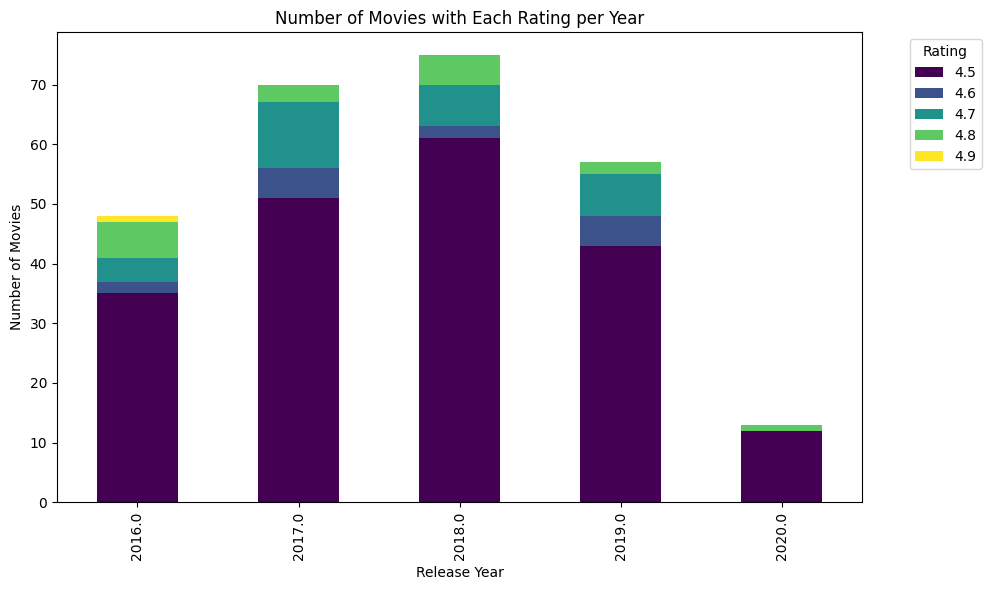

In [11]:
# 🔒This cell is locked. You will not be able to edit it.

# Pivot the data to create a table for the stacked bar chart
pivot_data = df_high_rated_recent.pivot_table(
    index="movie_release_year", 
    columns="rating", 
    values="movie_title", 
    aggfunc="count", 
    fill_value=0
)

# Plot the stacked bar chart
pivot_data.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")

# Add labels and title
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.title("Number of Movies with Each Rating per Year")
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Show the plot
plt.show()

<a id="ex5"></a>

#### Exercise 5: Director's Cuts

You want to identify the top 10 rated director's cuts, to help guide content strategy decisions, ensuring platforms prioritize high-quality, audience-approved films for their curated selections.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**
1. Write a SQL query to:
    - Retrieve the `movie_title`, `director_name`, and `rating` for movies where the title includes the phrase "director's cut". The phrase can appear at any part of the title, so you will need to use a wild card character before and after. 
    - Where the rating is not `NULL`.
    - Order the results by `rating` in decreasing order.
2. Execute the query.
3. Save the results.
</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- For string-based filtering, you can use the `LIKE` keyword to filter based on partial string matches.
- The phrase "director's cut" could appear at any part of the title. For that, use `%` as a wildcard for flexible matching.
- The case doesn't matter, so searching for "Director's cut" or "director's cut" will get the same results
- To get remove movies with no rating, you need to add a condition to the `WHERE` statement, you can use the `IS NOT NULL` condition to do the matching
- To order the results, you can use the `ORDER BY` statement
- Don't forget to finish the query with a semi-colon (;).
- To run the query, you can use the [🔗`pd.read_sql_query()`](https://pandas.pydata.org/docs/reference/api/pandas.read_sql.html) function. You only need to pass the query and the connection (in that order).
</ul>
</details>

In [12]:
# GRADED CELL: Exercise 5

### START CODE HERE ###

# write the query to get the "director's cut" movies
query_director_cut = """
SELECT movie_title, director_name, rating
FROM movies
WHERE movie_title LIKE "%director's cut%" 
  AND rating IS NOT NULL
ORDER BY rating DESC;
"""

# run the query and save the results
df_director_cut = pd.read_sql_query(query_director_cut, connection)

### END CODE HERE ###

In [13]:
# 🔒This cell is locked. You will not be able to edit it.

# print the results
df_director_cut

,movie_title,director_name,rating
0,Nymphomaniac: Volume I – The Director's Cut,Lars von Trier,4.0
1,Hysteria (Director's Cut),Matt Kirby,4.0
2,When I Get Home (Director's Cut),"Solange Knowles, Alan Ferguson, Terence Nance,...",4.0
3,Nymphomaniac: Volume II – The Director's Cut,Lars von Trier,3.7
4,Immoral Tales: Director's Cut,Walerian Borowczyk,3.6
5,Lola+Bilidikid (Director's Cut),Kutlug Ataman,3.5
6,Soul-Ache (Director's Cut),Fernando Merinero,3.5
7,Badfinger: Director's Cut,Gary J. Katz,3.5
8,Children of the Wind (Director's Cut),Fernando Merinero,3.4
9,Xena: Warrior Princess - A Friend in Need (The...,Rob Tapert,3.0


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgs/ex5.png" width="500"/>
</details>

You can use this data to identify the two directors with the most movies featuring director’s cuts, along with their average ratings.

In [14]:
# 🔒This cell is locked. You will not be able to edit it.

# group by director_name and calculate the count of movies and average rating
director_stats = df_director_cut.groupby("director_name").agg(
    movie_count=("movie_title", "count"),
    avg_rating=("rating", "mean")
).reset_index()

# sort by movie_count in descending order
director_stats = director_stats.sort_values(by="movie_count", ascending=False)

# select the top two directors
top_two_directors = director_stats.head(2)

# display the results
print(top_two_directors)

       director_name  movie_count  avg_rating
1  Fernando Merinero            2        3.45
4     Lars von Trier            2        3.85


<a id="ex-6"></a>

#### Exercise 6: Average Rating Per Year

Motivation: You want to understand how audience preferences evolve over time by examining average ratings.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**
1. Write a SQL query to:
    - Calculate the **average** `rating`, and **maximum** `movie_popularity` per release year.
    - Use the aliases `avg_rating`, and `max_popularity` respectively.
    - Return also the `movie_release_year`, with the alias `year`
    - Order the results by year in descending order.
    - Show only the results of the last 10 years in the dataset using the `LIMIT` statement.
2. Execute the query and save the results.
</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To calculate average and maximum values, you can use the `AVG()`, and `MAX()` functions respectively. In all cases, you need to pass the column you wish to operate on as an argument.
- To also show the release year, you will need to add it to the `SELECT` statement
- To segment by release year, you can use the `GROUP BY` statement.
- To order the results, use the `ORDER BY` statement, and indicate how you want the order, ASC or DESC.
- To filter the last 10 years, you can use the `LIMIT` statement.
- Don't forget to finish the query with a semi-colon (;).
- To run the query, you can use the [🔗`pd.read_sql_query()`](https://pandas.pydata.org/docs/reference/api/pandas.read_sql.html) function. You only need to pass the query and the connection (in that order).

</ul>
</details>

In [15]:
# GRADED CELL: Exercise 6

### START CODE HERE ###

# write a query to get the average rating and maximum popularity
query_avg_rating_year = """
SELECT 
    AVG(rating) AS avg_rating, 
    MAX(movie_popularity) AS max_popularity, 
    movie_release_year AS year
FROM movies
GROUP BY movie_release_year
ORDER BY year DESC
LIMIT 10;
"""

# run the query and save the results
df_avg_rating_year = pd.read_sql_query(query_avg_rating_year, connection)

### END CODE HERE ###

In [16]:
# 🔒This cell is locked. You will not be able to edit it.

# print the results
df_avg_rating_year

,avg_rating,max_popularity,year
0,2.406250,0,2021.0
1,3.001096,25,2020.0
2,2.993742,1933,2019.0
3,2.975750,854,2018.0
4,2.965855,1223,2017.0
5,2.925453,1238,2016.0
6,2.909311,1400,2015.0
7,2.874388,2091,2014.0
8,2.921012,1917,2013.0
9,2.943255,2384,2012.0


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgs/ex6.png" width="300"/>
</details>

To explore how audience preferences shift over time, you can visualize trends in average ratings and popularity.

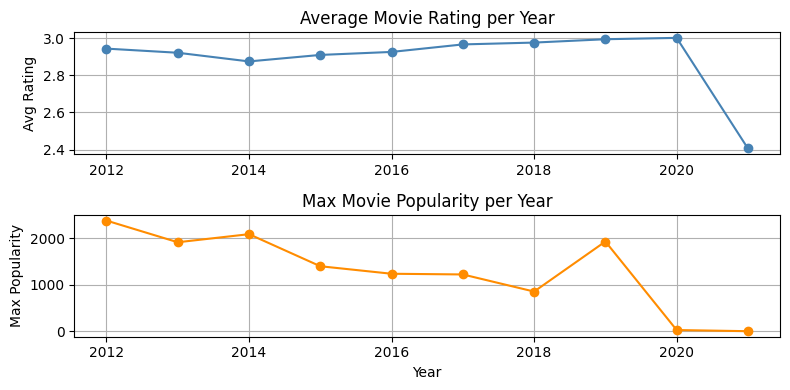

In [17]:
# 🔒This cell is locked. You will not be able to edit it.

plt.figure(figsize=(8, 4))

# add line plot for average rating
ax_rating = plt.subplot(2, 1, 1)
ax_rating.plot(df_avg_rating_year["year"], df_avg_rating_year["avg_rating"], marker="o", color="steelblue")
ax_rating.set_title("Average Movie Rating per Year")
ax_rating.set_ylabel("Avg Rating")
ax_rating.grid(True)

# add ine plot for maximum popularity
ax_popularity = plt.subplot(2, 1, 2)
ax_popularity.plot(df_avg_rating_year["year"], df_avg_rating_year["max_popularity"], marker="o", color="darkorange")
ax_popularity.set_title("Max Movie Popularity per Year")
ax_popularity.set_xlabel("Year")
ax_popularity.set_ylabel("Max Popularity")
ax_popularity.grid(True)

plt.tight_layout()
plt.show()

Can you explain the trend in popularity? Specially in 2020 and 2021 movies, probably movies were too new by the time the data was gathered, so there were no users that had actually "loved" the movie. 

<a id="ex-7"></a>

#### Exercise 7: Most Liked Critiques

The company wants to engage with the most liked critiques and is planning a campaign to offer them a free month of subscription in exchange for writing reviews of the latest movies.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**
1. Write a SQL query to:
    - Select the `movie_title` and `movie_release_year` from the `movies` table, and `critique` and `critique_likes` from the `ratings` table.
    - Use an `INNER JOIN` to join the data from both tables.
    - Order the results by `critique_likes` in **descending** order to identify the most commented movies.
    - Only show the results for reviews with the 10 highest number of likes.

2. Execute the query and save the results.
</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To show results from two different tables, you need to `JOIN` them to create a new table.
- The join is made on a specific column. It should look something like this:
    
    ```SQL
    table1 JOIN table2 ON table1.key = table2.key
    ```
    
    In this case, the key should be `movie_id`, which is the column linking both tables.
- Specify the columns you need in the SELECT statement. To select the columns from each table, you need to pre-append the table name followed by a period (.). It looks something like this: `table1.column_name`.
- Use `ORDER BY` to sort results in descending order (`DESC`).
- Limit results using the `LIMIT` statement.
- Don't forget to finish the query with a semi-colon (;).
- To run the query, you can use the [🔗`pd.read_sql_query()`](https://pandas.pydata.org/docs/reference/api/pandas.read_sql.html) function. You only need to pass the query and the connection (in that order).
</ul>
</details>

In [18]:
# GRADED CELL: Exercise 7

### START CODE HERE ###

# write a query to get the movie name and critiques of the most liked critiques
query_top_critiques = """
SELECT 
    m.movie_title, 
    m.movie_release_year, 
    r.critique, 
    r.critique_likes
FROM movies m
INNER JOIN ratings r ON m.movie_id = r.movie_id
ORDER BY r.critique_likes DESC
LIMIT 10;
"""

# run the query and save the results
df_top_critiques = pd.read_sql_query(query_top_critiques, connection)

### END CODE HERE ###

In [19]:
# 🔒This cell is locked. You will not be able to edit it.

# print the results
df_top_critiques

,movie_title,movie_release_year,critique,critique_likes
0,Call Me by Your Name,2017.0,Call me By Your Name. By my name. By our name....,79
1,Whale Valley,2013.0,nearly dead whale wants to live; nearly alive ...,78
2,La La Land,2016.0,This should have been called The Death of Tale...,74
3,Arrival,2016.0,ARRIVAL HAS CHANGED MY LIFE,67
4,Portrait of a Lady on Fire,2019.0,I adore films that look like paintings. It's ...,66
5,Stalker,1979.0,"The people who made this incredible film, one ...",63
6,Hidden,2005.0,"""If you think it's Majid, Pierrot, Georges, th...",62
7,Elle,2016.0,This is the perfect vehicle for Isabelle Huppe...,59
8,The Lobster,2015.0,"If I am going to be changed into an animal, I ...",59
9,The Florida Project,2017.0,Dysfunctional America. File this alongside Ame...,56


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>
<img src="imgs/ex7.png" width="600"/>
</span>
</details>

Use this DataFrame to find how many times each release year appears among the movies associated with the most liked critiques.

In [ ]:
# 🔒This cell is locked. You will not be able to edit it.

# group by movie_release_year and count the number of critiques
df_top_critiques.groupby("movie_release_year")["movie_title"].count()

<a id="ex-8"></a>

#### Exercise 8: Identifying Unrated Movies

You want to identify movies without ratings to better understand content gaps and viewer engagement.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**
1. Write a SQL query to:
    - Return the number of movies (count) that have no associated ratings in the `ratings` table. (**Hint**: use a `JOIN` statement).
    - Use the alias `num_no_reviews`.
2. Execute the query and save the DataFrame of results.
</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- One way to check which movies have no comments in the `ratings` table is by checking which movies appear in the `movies` table, but not in the `ratings` table.
- You can check this using a `LEFT JOIN`.
- Movies that are in the `movies` table, but not in the `ratings` table will have NULL values in the columns corresponding to the `ratings` table.
- To get the movies without ratings, you can filter using `WHERE` and look for the rows where `ratings.movie_id` is NULL.
- Finally, use `COUNT(*)` to get the number of rows.
</ul>
</details>

In [20]:
# GRADED CELL: Exercise 8

### START CODE HERE ###

# write a query to get the movie names of the movies with no ratings in the `ratings` table
query_no_ratings = """
SELECT COUNT(*) AS num_no_reviews
FROM movies m
LEFT JOIN ratings r ON m.movie_id = r.movie_id
WHERE r.movie_id IS NULL;
"""

# run the query and save the results
df_no_ratings = pd.read_sql_query(query_no_ratings, connection)


### END CODE HERE ###

In [21]:
# 🔒This cell is locked. You will not be able to edit it.

# print the results
df_no_ratings

,num_no_reviews
0,83911


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgs/ex8.png" width="150"/>
</details>

Find out what proportion of the total number of movies the unrated movies represent

In [22]:
print("Movies with no reviews comprise", 
      (df_no_ratings["num_no_reviews"]/df_unique_movies["num_unique_movies"]*100).values[0],
        "% of the movies in the database.")

Movies with no reviews comprise 37.034536025598584 % of the movies in the database.


Finally, run the next cell to close the connection

In [23]:
connection.close()

Congratulations on finishing this graded lab! If everything is running correctly, you can go ahead and submit your code for grading.